# CHAPTER 06. 차원 축소
## 01. 차원 축소(Dimension Reduction)의 개요

- **차원 축소** : 매우 많은 피처로 구성된 다차원 데이터 세트의 차원을 축소해 새로운 차원의 데이터 세트를 생성하는 것
- 차원이 증가할수록 단점 
	1.  데이터 포인트 간의 거리가 기하급수적으로 멀어지게 되고, 희소한 구조를 가지게 된다. 
	2. 예측 신뢰도가 떨어진다.
	3. 개별 피처간에 상관관계가 높을 가능성이 커, 다중공선성 문제로 예측 성능 저하된다.
- 차원 축소를해 피처 수를 줄이게 되면 
	1. 더 직관적으로 데이터를 해석할 수 있다.
	2. 학습 데이터의 크기가 줄어들어 학습에 필요한 처리 능력 줄일 수 있다.

- 차원축소
	1. **피처(특성) 선택** : 말 그대로 특정 피처에 종속성이 강한 불필요한 피처는 아예 제거하고, 데이터의 특징을 잘 나타내는 주요 피처만 선택
	2. **피처(특성) 추출** : 기존 피처를 저차원의 중요피처로 압축해서 추출하는것. 기존의 피처와는 다른 값이 된다. 
		- 단순 압축이 아닌, 피처를 함축적으로 더 잘 설명할 수 있는 또 다른 공간으로 매핑해 추출하는 것
		- 함축적인 특성 추출은 기존 피처가 전혀 인지하기 어려웠던 잠재적인 요소(Latent Factor)를 추출하는 것을 말한다.
        
        
이처럼 차원 축소는 단순히 데이터의 압축을 의미하는 것이 아닌, **차원 축소를 통해 좀 더 데이터를 잘 설명할 수 있는 잠재적인 요소를 추출**하는 데에 있다. 대표적으로 PCA, SVD, NMF 알고리즘이 있다.

- 차원 축소 알고리즘의 사용
	1. 매우 많은 픽셀로 이뤄진 이미지 데이터에서 잠재된 특성을 피처로 도출해 함축적 형태의 이미지 변환과 압축 수행
		- 예측 성능에 많은 도움이 된다.
	2. 텍스트 문서의 숨겨진 의미 추출
		- 문서 내 단어들의 구성에서 숨겨저 있는 시맨틱 의미나 토픽을 잠재 요소로 간주하고 이를 찾아낸다.
		- SVD, NMF는 시맨틱 토픽 모델링을 위한 기반 알고리즘으로 사용된다.

## 02. PCA(Principal Component Analysis)
### PCA 개요
: 가장 대표적인 차원 축소 기법. 여러 변수 간에 존재하는 상관관계를 이용해 이를 대표하는 주성분을 추출해 차원을 축소하는 기법. 
- PCA로 차원을 축소할 때는 기존 데이터의 정보 유실이 최소화되는 것이 당연하다. 이를 위해서 PCA는 가장 높은 분산을 가지는 데이터의 축을 찾아 이 축으로 차원을 축소하는데, 이것이 PCA의 주성분이 된다.(즉, 분산이 데이터의 특성을 가장 잘 나타내는 것으로 간주하는 것이다.)

- 데이터 변동성이 가장 큰 방향으로 축을 생성하고, 새롭게 생성된 축으로 데이터를 투영하는 방식
1. 제일 먼저 가장 큰 데이터 변동성(Variance)를 기반으로 첫 번째 벡터 축 생성.
2. 두번째 축은 이 벡터 축에 직각이 되는 벡터(직교 벡터)를 축으로 한다.
3. 세 번째 축은 다시 두 번째 축과 직각이 되는 벡터를 설정하는 방식
- 이렇게 생성된 벡터 축에 원본 데이터를 추영하면 벡터 축의 개수만큼의 차원으로 원본 데이터가 차원 축소 된다.

**PCA, 즉, 주성분 분석은 이처럼 원본 데이터의 피처 개수에 비해 매우 작은 주성분으로 원본 데이터의 총 변동성을 대부분 설명할 수 있는 분석법이다.**

#### 붓꽃(iris) 데이터 세트의 4개 속성을 2개의 PCA 차원으로 압축해 원래 데이터 세트와 압축된 데이터 세트가 어떻게 달라졌는지 확인

In [4]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

iris = load_iris()
# 넘파이 데이터 세트를 판다스 DataFrame으로 변환(시각화하기 편하도록)
columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
irisDF = pd.DataFrame(iris.data, columns=columns)
irisDF['target'] = iris.target
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


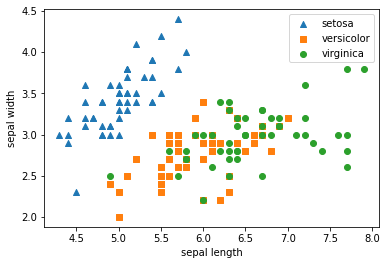

In [6]:
# 원본 붓꽃 데이터 세트의 분포 파악을 위해 2차원으로 시각화

# setosa는 세모, versicolor는 네모, virginica는 동그라미로 표현
markers=['^', 's', 'o']

# setosa의 target 값은 0, versicolor는 1, virginica는 2. 각 target별로 다른 모양으로 산점도로 표시
for i, marker in enumerate(markers):
    x_axis_data = irisDF[irisDF['target']==i]['sepal_length']
    y_axis_data = irisDF[irisDF['target']==i]['sepal_width']
    plt.scatter(x_axis_data, y_axis_data, marker=marker, label=iris.target_names[i])

plt.legend()
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()

Setosa 품종의 경우 sepal width가 3.0보다 크고, sepal length가 6.0 이하인 곳에 일정하게 분포돼 있다. Versicolor와 virginica의 경우는 sepal width와 sepal length 조건만으로는 분류가 어려운 복잡한 조건임을 알 수 있다.


- PCA로 4개 속성을 2개로 압축하기 전에, 개별 속성을 함께 스케일링해야 한다. PCA는 여러 속성의 값을 연산해야 하므로 속성의 스케일에 영향을 받는다. 따라서 **여러 속성을 PCA로 압축하기 전에 각 속성값을 동일한 스케일로 변환하는 것이 필요하다.**

In [9]:
from sklearn.preprocessing import StandardScaler

# Target 값을 제외한 모든 속성 값을 표준 정규 분포(평균 0, 분산 1)를 가지는 값들로 변환
iris_scaled = StandardScaler().fit_transform(irisDF.iloc[:, :-1])

In [11]:
# PCA를 적용해 4차원(4개 속성)의 붓꽃 데이터를 2차원(2개의 PCA속성) PCA 데이터로 변환

from sklearn.decomposition import PCA

# n_components : PCA로 변환할 차원의 수 
pca = PCA(n_components=2)

# fit()과 transform()을 호출해 PCA 변환 데이터 반환
pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)
print(iris_pca.shape)

(150, 2)


iris_pca는 변환된 PCA 데이터 세트를 150x2 넘파이 행렬로 가지고 있다 !

In [12]:
# 넘파이 행렬을 DataFrame으로 변환하기

# PCA 변환된 데이터의 칼럼 명을 각각 pca_component_1, pca_component_2로 명명
pca_columns=['pca_component_1', 'pca_component_2']
irisDF_pca = pd.DataFrame(iris_pca, columns=pca_columns)
irisDF_pca['target'] = iris.target
irisDF_pca.head(3)

,pca_component_1,pca_component_2,target
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0


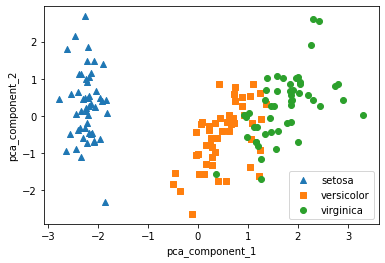

In [13]:
# 2개의 속성으로 PCA 변환된 데이터 세트를 2차원상에서 시각화

# setosa는 세모, versicolor는 네모, virginica는 동그라미로 표현
markers=['^', 's', 'o']

# pca_component_1을 x축, pca_component_2를 y축으로 
for i, marker in enumerate(markers):
    x_axis_data = irisDF_pca[irisDF_pca['target']==i]['pca_component_1']
    y_axis_data = irisDF_pca[irisDF_pca['target']==i]['pca_component_2']
    plt.scatter(x_axis_data, y_axis_data, marker=marker, label=iris.target_names[i])

plt.legend()
plt.xlabel('pca_component_1')
plt.ylabel('pca_component_2')
plt.show()

pca_component_1 축을 기반으로 Setosa 품종은 명확하게 구분이 가능하다. Versicolor와 Virginica는 pca_component_1 축을 기반으로 서로 겹치는 부분이 일부 존재하지만, 비교적 잘 구분되었다. 이는 PCA의 pca_component_1 축이 원본 데이터의 변동성을 잘 반영했기 때문이다.

In [15]:
# PCA 각 Component별로 원본 데이터의 변동성을 얼마나 반영하고 있는지 알아보기

print(pca.explained_variance_ratio_)

[0.72962445 0.22850762]


첫 번째 PCA 변환 요소인 pca_component_1이 전체 변동성의 약 72.96%를 차지하며, 두 번째 pca_component_2가 약 22.85%를 차지한다. **따라서 PCA를 2개 요소로만 변환해도 원본 데이터의 변동성을 95% 설명할 수 있다.**

#### 원본 붓꽃 데이터 세트와 PCA로 변환된 데이터 세트에 각각 분류 적용후 결과 비교

In [16]:
# 원본 붓꽃 데이터에 랜덤 포레스트 적용한 결과

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

rcf = RandomForestClassifier(random_state=156)
scores = cross_val_score(rcf, iris.data, iris.target, scoring='accuracy', cv=3)
print('원본 데이터 교차 검증 개별 정확도: ', scores)
print('원본 데이터 평균 정확도: ', np.mean(scores))

원본 데이터 교차 검증 개별 정확도:  [0.98 0.94 0.96]
원본 데이터 평균 정확도:  0.96


In [18]:
# PCA 변환한 데이터 세트에 랜덤 포레스트 적용
pca_X = irisDF_pca[['pca_component_1', 'pca_component_2']]
scores_pca = cross_val_score(rcf, pca_X, iris.target, scoring='accuracy', cv=3)
print('PCA 변환 데이터 교차 검증 개별 정확도: ', scores_pca)
print('PCA 변환 데이터 평균 정확도: ', np.mean(scores_pca))

PCA 변환 데이터 교차 검증 개별 정확도:  [0.88 0.88 0.88]
PCA 변환 데이터 평균 정확도:  0.88


원본 데이터 세트 대비 예측 정확도는 PCA 변환 차원 개수에 따라 예측 성능이 떨어질 수 밖에 없다. 정확도가 원본 데이터 대비 10% 하락했으나, 속성이 4개에서 2개로, 개수가 50% 감소한 것을 고려한다면 PCA 변환 후에도 원본 데이터의 특성을 상당 부분 유지하고 있음을 알 수 있다.

#### 더 많은 피처를 가진 데이터 세트(신용카드 고객 데이터 세트)를 적은 PCA 컴포넌트 기반으로 변환하기

In [2]:
import pandas as pd

# header로 의미 없는 첫 행 제거, iloc로 기존 id제거
df = pd.read_excel('/Users/wizdom/Desktop/data_analysis/파이썬 머신러닝 완벽가이드/실습 데이터/credit_card.xls', header=1,
                  sheet_name='Data').iloc[0:, 1:]
print(df.shape)
df.head(3)

(30000, 24)


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0


Target 값은 'default payment next month'(다음달 연체 여부)이다. '연체'일경우 1, '정상납부'가 0이다. 

In [3]:
# 칼럼명 바꾸기
df.rename(columns={'PAY_0':'PAY_1', 'default payment next month':'default'}, inplace=True)
y_target = df['default']
X_features = df.drop('default', axis=1)

<AxesSubplot:>

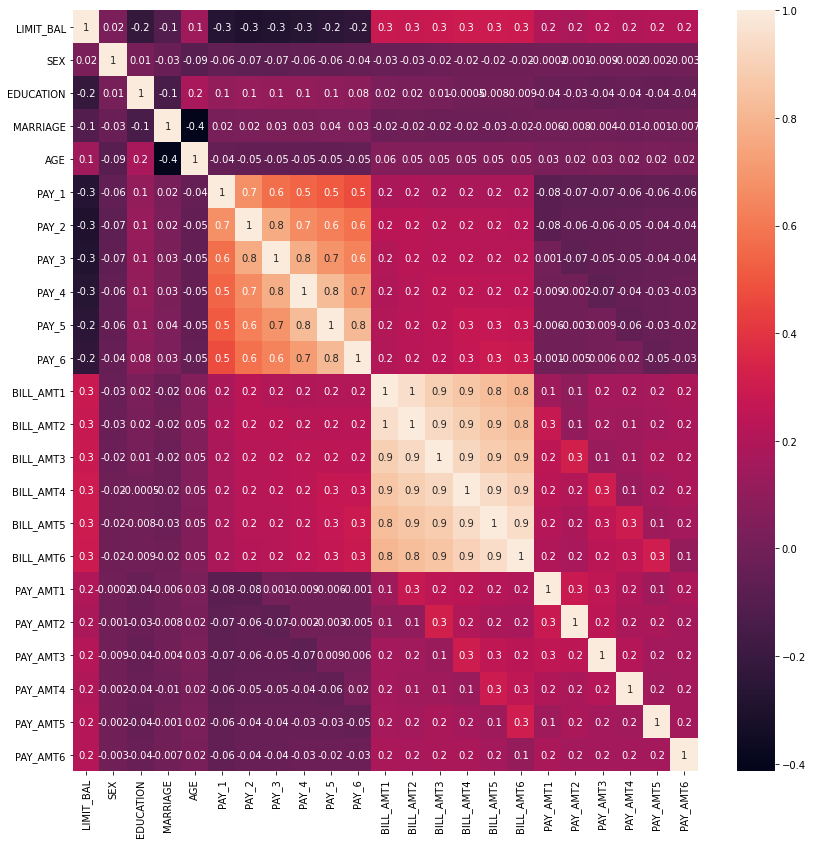

In [5]:
# 데이터 세트에는 23개의 속성 데이터 세트가 있으나 각 속성끼리 상관도가 높다.
# corr()를 이용해 각 속성간의 상관도를 구한뒤 시각화하기

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

corr = X_features.corr()
plt.figure(figsize=(14, 14))
# annot : 각 cell의 값 표기 유무
# fmt : 그 값의 데이터 타입 설정
sns.heatmap(corr, annot=True, fmt='.1g')

BILL_AMT1 ~ BILL_AMT6 6개 속성끼리 상관도가 대부분 0/9 이상으로 매우 높음을 알 수 있다. 또한 PAY_1 ~ PAY_6까지의 속성도 상관도가 높다. 이렇게 높은 상관도를 가진 속성들은 소수의 PCA만으로도 속성들의 변동성을 수용할 수 있다.

In [8]:
# BILL_AMT1 ~ BILL_AMT6 6개 속성을 2개의 컴포넌트로 PCA 변환한 뒤, 개별 컴포넌트 변동성 알아보기

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# BILL_AMT1 ~ BILL_AMT6까지 6개 속성명 생성
cols_bill = ['BILL_AMT' + str(i) for i in range(1, 7)]
print('대상 속성명: ', cols_bill)

# 개별 속성 스케일링 
scaler = StandardScaler()
df_cols_scaled = scaler.fit_transform(X_features[cols_bill])
# 2개의 PCA 속성을 가진 PCA 객체 생성하고, explained_variance_ratio_ 계산을 위해 fit()호출
pca = PCA(n_components=2)
pca.fit(df_cols_scaled)
print('PCA Compoenet별 변동성:', pca.explained_variance_ratio_)

대상 속성명:  ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
PCA Compoenet별 변동성: [0.90555253 0.0509867 ]


2개의 PCA 컴포넌트로 6개 속성의 변동성을 약 95% 이상 설명할 수 있다. 첫 번째 PCA 축으로 90% 변동성을 수용할 정도로 6개 속성의 상관도가 매우 높다는 것을 알 수 있다.

#### 원본 데이터 세트와 6개의 컴포넌트로 PCA 변환한 데이터 세트의 분류 예측 결과를 상호 비교하기

In [10]:
# 원본 데이터 세트에 랜덤 포레스트 이용

import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rcf = RandomForestClassifier(n_estimators=300, random_state=156)
scores = cross_val_score(rcf, X_features, y_target, scoring='accuracy', cv=3)

print('CV=3인 경우의 개별 Fold 세트별 정확도: ', scores)
print('평균 정확도: {0:.4f}'.format(np.mean(scores)))

CV=3인 경우의 개별 Fold 세트별 정확도:  [0.8083 0.8196 0.8232]
평균 정확도: 0.8170


In [13]:
# 6개의 컴포넌트로 PCA 변환한 데이터 세트에 대해 분류 예측 적용

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 원본 데이터 세트에 먼저 StandardScaler 적용(스케일링)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(X_features)

# 6개의 컴포넌트를 가진 PCA 변환 수행
pca = PCA(n_components=6)
df_pca = pca.fit_transform(df_scaled)
# 분류 예측 수행
scores_pca = cross_val_score(rcf, df_pca, y_target, scoring='accuracy', cv=3)

print('CV=3인 경우의 PCA 변환된 개별 Fold 세트별 정확도: ', scores_pca)
print('PCA 변환 데이터 세트 평균 정확도: {0:.4f}'.format(np.mean(scores_pca)))

CV=3인 경우의 PCA 변환된 개별 Fold 세트별 정확도:  [0.7906 0.7986 0.8013]
PCA 변환 데이터 세트 평균 정확도: 0.7968


전체 23개 속성의 약 1/4 수준인 6개의 PCA 컴포넌트만으로도 원본 데이터를 기반으로 한 분류 예측 결과보다 약 1~2% 정도의 예측 성능 저하만 발생했다. 전체 속성의 1/4 정도만으로도 이 정도 수치의 예측 성능을 유지할 수 있다는 것은 PCA의 뛰어난 압축 능력을 잘 보여주는 것이다. 

## 03. LDA(Linear Discriminant Analysis)
### LDA 개요
: 선형 판별 분석법. PCA와 매우 유사하다. 입력 데이터 세트를 저차원 공간에 투영해 차원을 축소하는 기법은 유사하지만, **중요한 차이는 LDA는 지도학습의 분류에서 사용하기 쉽도록 개별 클래스를 분별할 수 있는 기준을 최대한 유지하면서 차원을 축소한다.** 
- 입력 데이터의 결정 값 클래스를 최대한으로 분리할 수 있는 축을 찾는다.
    - 클래스 간 분산(between-class scatter)과 클래스 내부 분산(within-class scatter)의 비율을 최대화하는 방식으로 차원을 축소한다.
    - 즉, 클래스 간 분산은 최대한 크게 가져가고, 클래스 내부의 분산은 최대한 작게 가져가는 방식이다.
- LDA는 실제로는 PCA와 다르게 비지도학습이 아닌 **지도학습**이다 ! 즉, 클래스의 결정 값이 변환시에 필요하다.

### 붓꽃 데이터 세트에 LCA 적용하기

In [14]:
# 붓꽃 데이터 세트 로드 및 표준 정규 분포로 스케일링

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

iris = load_iris()
iris_scaled = StandardScaler().fit_transform(iris.data)

In [17]:
# 2개의 컴포넌트로 붓꽃 데이텉를 LDA 변환하기

lda = LinearDiscriminantAnalysis(n_components=2)
# LDA는 지도학습이기 때문에 클래스의 결정값이 변환시에 필요하다.
lda.fit(iris_scaled, iris.target)
iris_lda = lda.transform(iris_scaled)
print(iris_lda.shape)

(150, 2)


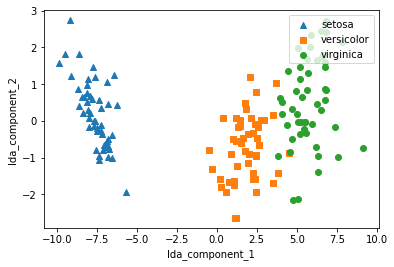

In [20]:
# 변환된 입력 데이터 값을 2차원 평면에 품종별로 표현하기

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

lda_columns=['lda_component_1', 'lda_component_2']
irisDF_lda = pd.DataFrame(iris_lda, columns=lda_columns)
irisDF_lda['target'] = iris.target

# setosa는 세모, versicolor는 네모, virginica는 동그라미로 표현
markers = ['^', 's', 'o']

# setosa의 target값은 0, versicolor는 1, virginica는 2. 각 target별로 다른 모양으로 산점도로 표시
for i, marker in enumerate(markers):
    x_axis_data = irisDF_lda[irisDF_lda['target']==i]['lda_component_1']
    y_axis_data = irisDF_lda[irisDF_lda['target']==i]['lda_component_2']
    
    plt.scatter(x_axis_data, y_axis_data, marker=marker, label=iris.target_names[i])
    
plt.legend(loc='upper right')
plt.xlabel('lda_component_1')
plt.ylabel('lda_component_2')
plt.show()

## 04.SVD(Singular Value Decomposition)
### SVD 개요
: PCA와 유사한 행렬 분해 기법을 이용한다. 하지만 SVD는 PCA와 다르게 정방행렬뿐만 아니라 행과 열의 크기가 다른 행렬에도 적용할 수 있다. SVD는 특이값 분해로 불린다.
- PCA와 유사하게 컴퓨터 비전 영역에서 이미지 압축을 통한 패턴 인식과 신호 처리 분야에서 사용된다. 또한 텍스트의 토픽 모델링 기법인 LSA의 기반 알고리즘이다.
- 넘파이 SVD 모듈 : numpy.linalg.svd (사이파이의 SVD : scipy.linalg.svd)
- 랜덤 행렬 생성하는 이유 : 행렬의 개별 로우끼리의 의존성을 없애기 위함

In [1]:
# 넘파이의 svd 모듈 임포트
import numpy as np
from numpy.linalg import svd

# 4X4 랜덤 행렬 a 생성
np.random.seed(121)
# randn() : 기댓값이 0이고 표준편차가 1인 가우시안 표준 정규 분포를 따르는 난수 생성
a = np.random.randn(4, 4)
print(np.round(a, 3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.014  0.63   1.71  -1.327]
 [ 0.402 -0.191  1.404 -1.969]]


- numpy.linalh.svd에 파라미터로 원본 행렬을 입력하면 U 행렬, Sigma 행렬, V 전치 행렬을 반환한다.
    - Sigma 행렬은 A=U∑Vᵀ에서 ∑를 나타내며, ∑ 행렬의 경우 행렬의 대각에 위치한 값만 0이 아니고, 그렇지 ㅇ낳은 경우는 모두 0이므로 0이 아닌 값의 경우만 1차원 행렬로 표현한다.

In [2]:
# 생성된 a 행렬에 SVD를 적용해 U, Sigma, Vt 도출

U, Sigma, Vt = svd(a)
print(U.shape, Sigma.shape, Vt.shape)
print('U matrix: \n', np.round(U, 3))
print('Sigma Value: \n', np.round(Sigma, 3))
print('V transpose matrix: \n', np.round(Vt, 3))

(4, 4) (4,) (4, 4)
U matrix: 
 [[-0.079 -0.318  0.867  0.376]
 [ 0.383  0.787  0.12   0.469]
 [ 0.656  0.022  0.357 -0.664]
 [ 0.645 -0.529 -0.328  0.444]]
Sigma Value: 
 [3.423 2.023 0.463 0.079]
V transpose matrix: 
 [[ 0.041  0.224  0.786 -0.574]
 [-0.2    0.562  0.37   0.712]
 [-0.778  0.395 -0.333 -0.357]
 [-0.593 -0.692  0.366  0.189]]


- **원본 행렬로의 복원** : U, Sigma, Vt를 내적한다.
    - **유의할 점** : Sigma의 경우 0이 아닌 값만 1차원으로 추출했으므로 다시 0을 포함한 대칭행렬고 변환한 뒤에 내적을 수행해야 한다.

In [3]:
# U, Sigma, Vt를 이용해 다시 원본 행렬로 복원해보기

# Sigma를 다시 0을 포함한 대칭행렬로 변환
# np.diag() : 대각선 요소의 값만 추출한 배열 구하기
Sigma_mat = np.diag(Sigma)
a_ = np.dot(np.dot(U, Sigma_mat), Vt) # np.dot() : numpy array를 곱할때 사용
print(np.round(a_, 3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.014  0.63   1.71  -1.327]
 [ 0.402 -0.191  1.404 -1.969]]


U, Sigma, Vt를 이용해 a_는 원본 행렬 a와 동일하게 복원됨을 알 수 있다.

In [4]:
# 데이터 세트가 로우간 의존성이 있을 경우 어떻게 Sigma 값이 변하고, 이에 따른 차원 축소가 진행될 수 있는지 알아보기

# 의존성 부여하기 위해 a 행렬의 3번째 로우를 a[0] + a[1]로 주고, 4번째 로우는 a[0]와 같다고 업데이트하기
a[2] = a[0] + a[1]
a[3] = a[0]
print(np.round(a, 3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.542  0.899  1.041 -0.073]
 [-0.212 -0.285 -0.574 -0.44 ]]


a 행렬은 로우간 관계가 매우 높아졌다.

In [5]:
# a 행렬 SVD로 다시 분해하고 Sigma값 확인
U, Sigma, Vt = svd(a)
print(U.shape, Sigma.shape, Vt.shape)
print('Sigma Value: \n', np.round(Sigma, 3))

(4, 4) (4,) (4, 4)
Sigma Value: 
 [2.663 0.807 0.    0.   ]


이전과 차원은 같으나 Sigma 값 중 2개가 0으로 변했다. 즉, 선형 독립인 로우 벡터의 개수가 2개라는 의미이다.

In [7]:
# U, Sigma, Vt 전체 데이터를 이용하지 않고 Sigma의 0에 대응되는 U, Sigma, Vt의 데이터를 제외하고 복원

# U 행렬의 경우는 Sigma와 내적을 수행하므로 Sigma의 앞 2행에 대응되는 앞 2열만 추출
U_ = U[:, :2]
Sigma_ = np.diag(Sigma[:2])
# V 전치 행렬의 경우는 앞 2행만 추출
Vt_ = Vt[:2]
print(U_.shape, Sigma_.shape, Vt_.shape)
# U, Sigma, Vt의 내적을 수행하며 다시 원본 행렬 복원
a_ = np.dot(np.dot(U_, Sigma_), Vt_)
print(np.round(a_, 3))

(4, 2) (2, 2) (2, 4)
[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.542  0.899  1.041 -0.073]
 [-0.212 -0.285 -0.574 -0.44 ]]


#### Truncated SVD를 이용해 행렬 분해
: ∑ 행렬에 있는 대각원소, 즉 특이값 중 상위 일부 데이터만 추출해 분해하는 방식. 
- 이렇게 분해하면 인위적으로 더 작은 차원의 U, ∑, Vᵀ로 분해하기 때문에 원본 행렬을 정확하게 다시 원복할 수 없다.
- 하 ! 지 ! 만 ! 데이터 정보가 압축되어 분해됨에도 불구하고 상당한 수준으로 원본 행렬을 근사할 수 있다.
    - 원래 차원의 차수에 가깝게 잘라낼수록(Truncate) 원본 행렬에 더 가깝게 복원할 수 있다.
- 사이파이에서만 지원된다. Truncated SVD는 희소 행렬로만 지원되므로 **scipy.sparse.linalg.svds** 이용

In [8]:
# 1. 임의의 원본 행렬 6 x 6을 Normal SVD로 분해해 분해된 행렬의 차원과 Sigma 행렬 내의 특이값 확인
# 2. 다시 Truncated SVD로 분해해 분해된 행렬의 차원, Sigma 행렬 내의 특이 값 구하기
# 3. Truncated SVD로 분해된 행렬의 내적을 계산하여 다시 복원된 데이터와 원본 데이터 비교하기

import numpy as np
from scipy.sparse.linalg import svds
from scipy.linalg import svd

# 원본 행렬을 출력하고 SVD를 적용할 경우, U, Sigma, Vt의 차원 확인
np.random.seed(121)
matrix = np.random.random((6, 6))
print('원본 행렬: \n', matrix)
U, Sigma, Vt = svd(matrix, full_matrices=False) # full_matrices=False : 축소형 구할때(차원축소)(True이면 원래 svd.차원분해)
print('\n분해 행렬 차원: ', U.shape, Sigma.shape, Vt.shape)
print('\nSigma값 행렬: ', Sigma)

# Truncated SVD로 Sigma 행렬의 특이값을 4개로 하여 Truncated SVD 수행
num_components = 4
U_tr, Sigma_tr, Vt_tr = svds(matrix, k=num_components)
print('\nTruncated SVD 분해 행렬 차원: ', U_tr.shape, Sigma_tr.shape, Vt_tr.shape)
print('\nTruncated SVD Sigma값 행렬: ', Sigma_tr)

matrix_tr = np.dot(np.dot(U_tr, np.diag(Sigma_tr)), Vt_tr) # output of TruncatedSVD
print('\nTruncated SVD로 분해 후 복원 행렬: \n', matrix_tr)

원본 행렬: 
 [[0.11133083 0.21076757 0.23296249 0.15194456 0.83017814 0.40791941]
 [0.5557906  0.74552394 0.24849976 0.9686594  0.95268418 0.48984885]
 [0.01829731 0.85760612 0.40493829 0.62247394 0.29537149 0.92958852]
 [0.4056155  0.56730065 0.24575605 0.22573721 0.03827786 0.58098021]
 [0.82925331 0.77326256 0.94693849 0.73632338 0.67328275 0.74517176]
 [0.51161442 0.46920965 0.6439515  0.82081228 0.14548493 0.01806415]]

분해 행렬 차원:  (6, 6) (6,) (6, 6)

Sigma값 행렬:  [3.2535007  0.88116505 0.83865238 0.55463089 0.35834824 0.0349925 ]

Truncated SVD 분해 행렬 차원:  (6, 4) (4,) (4, 6)

Truncated SVD Sigma값 행렬:  [0.55463089 0.83865238 0.88116505 3.2535007 ]

Truncated SVD로 분해 후 복원 행렬: 
 [[0.19222941 0.21792946 0.15951023 0.14084013 0.81641405 0.42533093]
 [0.44874275 0.72204422 0.34594106 0.99148577 0.96866325 0.4754868 ]
 [0.12656662 0.88860729 0.30625735 0.59517439 0.28036734 0.93961948]
 [0.23989012 0.51026588 0.39697353 0.27308905 0.05971563 0.57156395]
 [0.83806144 0.78847467 0.93868685 0.726

Truncated SVD로 분해된 행렬로 다시 복원할 경우 완벽하게 복원되지 않고 근사적으로 복원됨을 알 수 있다.

### 사이킷런 TruncatedSVD 클래스를 이용한 변환
: PCA 클래스와 유사하게 fit()과 transform()을 호출해 원본 데이터를 몇 개의 주요 컴포넌트(즉, Truncated SVD의 K 컴포넌트 수)로 차원을 축소해 변환한다. 원본 데이터를 Truncated SVD 방식으로 분해된 U*Sigma 행렬에 선형 변환해 생성한다. (Truncated SVD 연산을 수행해 원본 행렬을 분해한 U, Sigma, Vt 행렬 반환하지 않음)

Text(0, 0.5, 'TruncatedSVD Component 2')

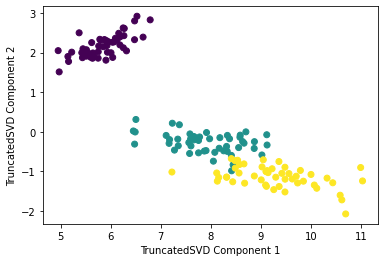

In [9]:
# 붓꽃 데이터 세트를 TruncatedSVD이용해 변환

from sklearn.decomposition import TruncatedSVD, PCA
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

iris = load_iris()
iris_ftrs = iris.data
# 2개의 주요 컴포넌트로 TruncatedSVD 변환
tsvd = TruncatedSVD(n_components=2)
tsvd.fit(iris_ftrs)
iris_tsvd = tsvd.transform(iris_ftrs)

# 산점도 2차원으로 TruncatedSVD 변환된 데이터 표현. 품종은 색깔로 구분
plt.scatter(x=iris_tsvd[:, 0], y=iris_tsvd[:, 1], c=iris.target)
plt.xlabel('TruncatedSVD Component 1')
plt.ylabel('TruncatedSVD Component 2')

TruncatedSVD 변환은 PCA와 유사하게 변환 후에 품종별로 어느 정도 클러스터링이 가능할 정도로 각 변환 속성으로 뛰어난 고유성을 가지고 있음을 알 수 있다.

사이킷런의 TruncatedSVD와 PCA 클래스는 둘다 SVD를 이용해 행렬을 분해한다. 붓꽃 데이터를 스케일링한 뒤, 두 클래스 변환을 해보면 두개가 거의 동일함을 알 수 있다.

Text(0.5, 1.0, 'PCA Transformed')

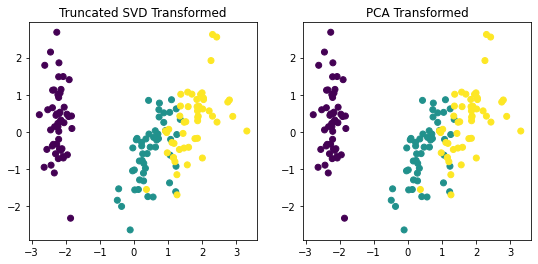

In [11]:
from sklearn.preprocessing import StandardScaler

# 붓꽃 데이터를 StandardScaler로 변환
scaler = StandardScaler()
iris_scaled = scaler.fit_transform(iris_ftrs)

# 스케일링된 데이터를 기반으로 TruncatedSVD 변환 수행
tsvd = TruncatedSVD(n_components=2)
tsvd.fit(iris_scaled)
iris_tsvd = tsvd.transform(iris_scaled)

# 스케일링된 데이터를 기반으로 PCA 변환 수행
pca = PCA(n_components=2)
pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)

# TruncatedSVD 변환 데이터를 왼쪽에, PCA 변환 데이터를 오른쪽에 표현
fig, (ax1, ax2) = plt.subplots(figsize=(9, 4), ncols=2)
ax1.scatter(x=iris_tsvd[:, 0], y=iris_tsvd[:, 1], c=iris.target)
ax2.scatter(x=iris_pca[:, 0], y=iris_pca[:, 1], c=iris.target)
ax1.set_title('Truncated SVD Transformed')
ax2.set_title('PCA Transformed')

In [12]:
# 두 개의 변환 행렬 값과 원본 속성별 컴포넌트 비율값 비교해보기

print((iris_pca - iris_tsvd).mean())
print((pca.components_ - tsvd.components_).mean())

2.330427517627243e-15
-7.41594285980085e-17


모두 0에 가까운 값이므로 2개의 변환이 서로 동일함을 알 수 있다.


즉, 데이터 세트가 스케일링으로 데이터 중심이 동일해지면 사이킷런의 SVD와 PCA는 동일한 변환을 수행한다. 이는 PCA가 SVD 알고리즘으로 구현됐음을 의미한다. 하지만 PCA는 밀집행렬에 대한 변환만 가능하며 SVD는 희소 행렬에 대한 변환도 가능하다.

## 05.NMF(Non-Negative Matrix Factorization)
### NMF 개요
: Truncated SVD와 같이 낮은 랭크를 통한 행렬 근사(Low-Rank Approximation) 방식의 변형이다. 원본 행렬 내의 모든 원소 값이 모두 양수라는 게 보장되면 좀 더 간단하게 두 개의 기반 양수 행렬을 분해될 수 있는 기법을 지칭한다.
- 행렬분해(Matrix Factorization)는 일반적으로 SVD와 같은 행렬 분해 기법을 통칭하는 것이다.
    - 일반적으로 **길고 가는 행렬 W**와 **작고 넓은 행렬 H**로 분해된다.
    - 이렇게 분해된 행렬은 잠재요소를 특성으로 가지게 된다.
    - **분해 행렬 W** : 원본 행에 대해서 이 **잠재 요소의 값이 얼마나 되는지**에 대응
    - ****분해 행렬 H : **잠재 요소가 원본 열(원본 속성)로 어떻게 구성됐는지** 나타내는 행렬
 

- SVD와 유사하게 차원 축소를 통한 잠재 요소 도출로 이미지 변환 및 압축, 텍스트의 토픽 모델링 기법, 문서 유사도 및 클러스터링 등의 영역에서 사용된다. 또한 영화 추천과 같은 추천 영역에서 활발하게 적용된다.(잠재요소 기반의 추천 방식 )
- 사이킷런의 NMF 클래스

/opt/anaconda3/envs/py3.7/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1077: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)


Text(0, 0.5, 'NMF Component 2')

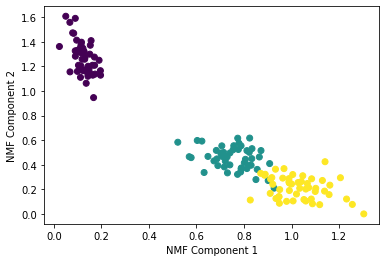

In [13]:
# 붓꽃 데이터를 NMF를 이용해 2개의 컴포넌트로 변환하고 시각화

from sklearn.decomposition import NMF
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

iris = load_iris()
iris_ftrs = iris.data
nmf = NMF(n_components=2)
nmf.fit(iris_ftrs)
iris_nmf = nmf.transform(iris_ftrs)

plt.scatter(x=iris_nmf[:, 0], y=iris_nmf[:, 1], c=iris.target)
plt.xlabel('NMF Component 1')
plt.ylabel('NMF Component 2')